# LangChain and Google's Gemini

In [ ]:
!pip install -q -r ./requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install -q langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade -q langchain-google-genai

In [ ]:
!pip show langchain-google-genai

Name: langchain-google-genai
Version: 1.0.3
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-generativeai, langchain-core
Required-by: 


In [ ]:
!pip install -q google-generativeai

In [ ]:
# loading the API key form .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [ ]:
# prompting the user for the API key if it wasn't loaded from .env
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [ ]:
# listing all available models
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


## Integrating Gemini with LangChain

In [ ]:
# Import the necessary class for interacting with Google's generative AI models
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of the LLM, using the 'gemini-pro' model and set creativity level
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)

# Send a prompt to the LLM, requesting a creative paragraph
response = llm.invoke('Write a paragraph about life on Mars in year 2100.')

# Print the generated text from the LLM's response
print(response.content)

In the year 2100, life on Mars has flourished into a vibrant society. Terraforming efforts have transformed the once barren landscape into lush, verdant valleys, where rivers meander through thriving ecosystems. Domed cities, marvels of human ingenuity, provide a protective environment for a thriving population of scientists, engineers, and adventurers. Artificial intelligence assistants seamlessly integrate into daily life, offering support and companionship. Exploration beyond the established settlements reveals ancient Martian artifacts, hinting at the planet's enigmatic past. The Martian colony has become a beacon of hope and innovation, showcasing the indomitable spirit of human exploration and the potential for life to thrive beyond Earth.


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# Create a chain that will use the LLM and prompt
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Why will AI change the world'

# Execute the chain, providing the topic as input
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Why will AI change the world

> Finished chain.
{'topic': 'Why will AI change the world', 'text': '📣 AI Revolution: Brace yourself for a transformative future! 🤖✨ AI will revolutionize industries, automate tasks, enhance decision-making, and unlock unprecedented possibilities. From healthcare to finance, from education to entertainment, AI is poised to change the world as we know it. Get ready for the AI-driven era! #AIRevolution #FutureTech'}


In [ ]:
print(response['topic'])
print()
print(response['text'])

Why will AI change the world

📣 AI Revolution: Brace yourself for a transformative future! 🤖✨ AI will revolutionize industries, automate tasks, enhance decision-making, and unlock unprecedented possibilities. From healthcare to finance, from education to entertainment, AI is poised to change the world as we know it. Get ready for the AI-driven era! #AIRevolution #FutureTech


## System Prompt and Streaming

### System prompt

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in French.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)
output.content

/usr/local/lib/python3.10/dist-packages/langchain_google_genai/chat_models.py:326: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


'No'

### Streaming

In [ ]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0)
prompt = 'Write a scientific paper outlining the mathematical foundation of our universe.'
response = llm.invoke(prompt)
print(response.content)

**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks to modern-day physicists, scientists have sought to unravel the mysteries of the cosmos through observation, experimentation, and mathematical modeling. Mathematics has emerged as an indispensable tool in this quest, providing a language for describing the universe's structure and dynamics.

**Geometry and Topology:**

Geometry and topology are fundam

In [ ]:
# enabling streaming
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 100)


**Title:** The Mathematical Foundation of Our Universe

**Abstract:**

The universe
----------------------------------------------------------------------------------------------------
 we inhabit is governed by a set of fundamental mathematical principles that underpin its structure, dynamics, and evolution. This paper explores the mathematical foundation of our universe, examining
----------------------------------------------------------------------------------------------------
 the key mathematical concepts and theories that provide a framework for understanding the cosmos. We discuss the role of geometry, topology, algebra, and calculus in describing the universe's properties and behavior.

**Introduction:**

The pursuit of understanding the universe has been a central endeavor of human inquiry for centuries. From the ancient Greeks
----------------------------------------------------------------------------------------------------
 to modern-day physicists, scientists have sough

## Multimodal AI with Gemini Pro Vision

In [ ]:
!pip install -q pillow

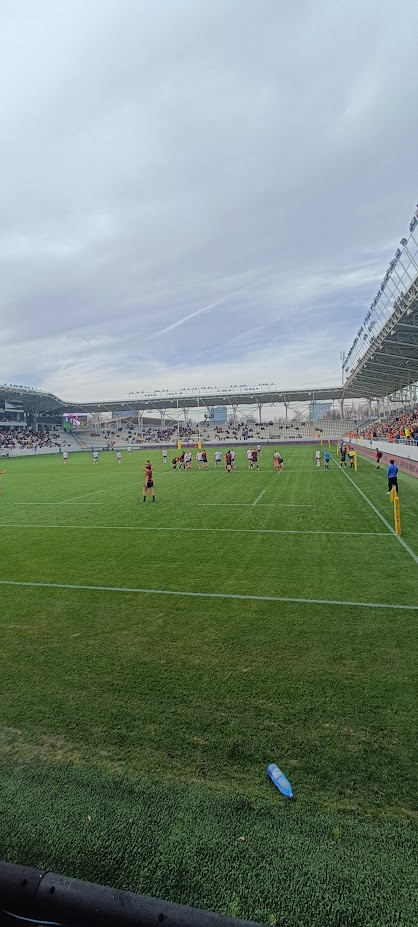

In [ ]:
from PIL import Image
img = Image.open('match.jpg')
img

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

# Create LLM instance, using a model specialized for images
llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')

# The question to ask about the image
prompt = 'What is in this image?'

# Create a structured message combining text and image reference
message = HumanMessage(
  content=[
    {'type': 'text', 'text': prompt},  # Include the textual prompt
    {'type': 'image_url', 'image_url': img}  # Include a reference to the image (img variable holds the URL)
  ]
)

# Send the message to the LLM for analysis
response = llm.invoke([message])
# Print the LLM's description of the image
print(response.content)

 A rugby match.


In [ ]:
def ask_gemini(text, image, model='gemini-pro-vision'):
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
        content=[
            {'type': 'text', 'text': text},
            {'type': 'image_url', 'image_url': image}
        ]
    )
    response = llm.invoke([message])
    return response


In [ ]:
response = ask_gemini('What is this sport? How can I identify the sport in this picture?', img)
print(response.content)

 The sport in this picture is rugby. 

Rugby is a team sport that is played on a rectangular field with two H-shaped goal posts at each end. The objective of the game is to score more points than the opposing team by grounding the ball in the opponent's in-goal area (known as a try) or by kicking the ball through the goal posts (known as a goal). 

The game is played by two teams of 15 players each. The players use their hands and feet to move the ball up and down the field. The ball can be passed, kicked, or carried. The team in possession of the ball can score points by grounding the ball in the opponent's in-goal area or by kicking the ball through the goal posts. 

The game is divided into two halves, each lasting 40 minutes. The team with the most points at the end of the game is declared the winner.

There are a number of ways to identify the sport in this picture. First, the field is a rectangular shape with two H-shaped goal posts at each end. This is a characteristic of a rugb

In [ ]:
response = ask_gemini('How many players can you identify in each team?', img)
print(response.content)

 There are 15 players in each team.


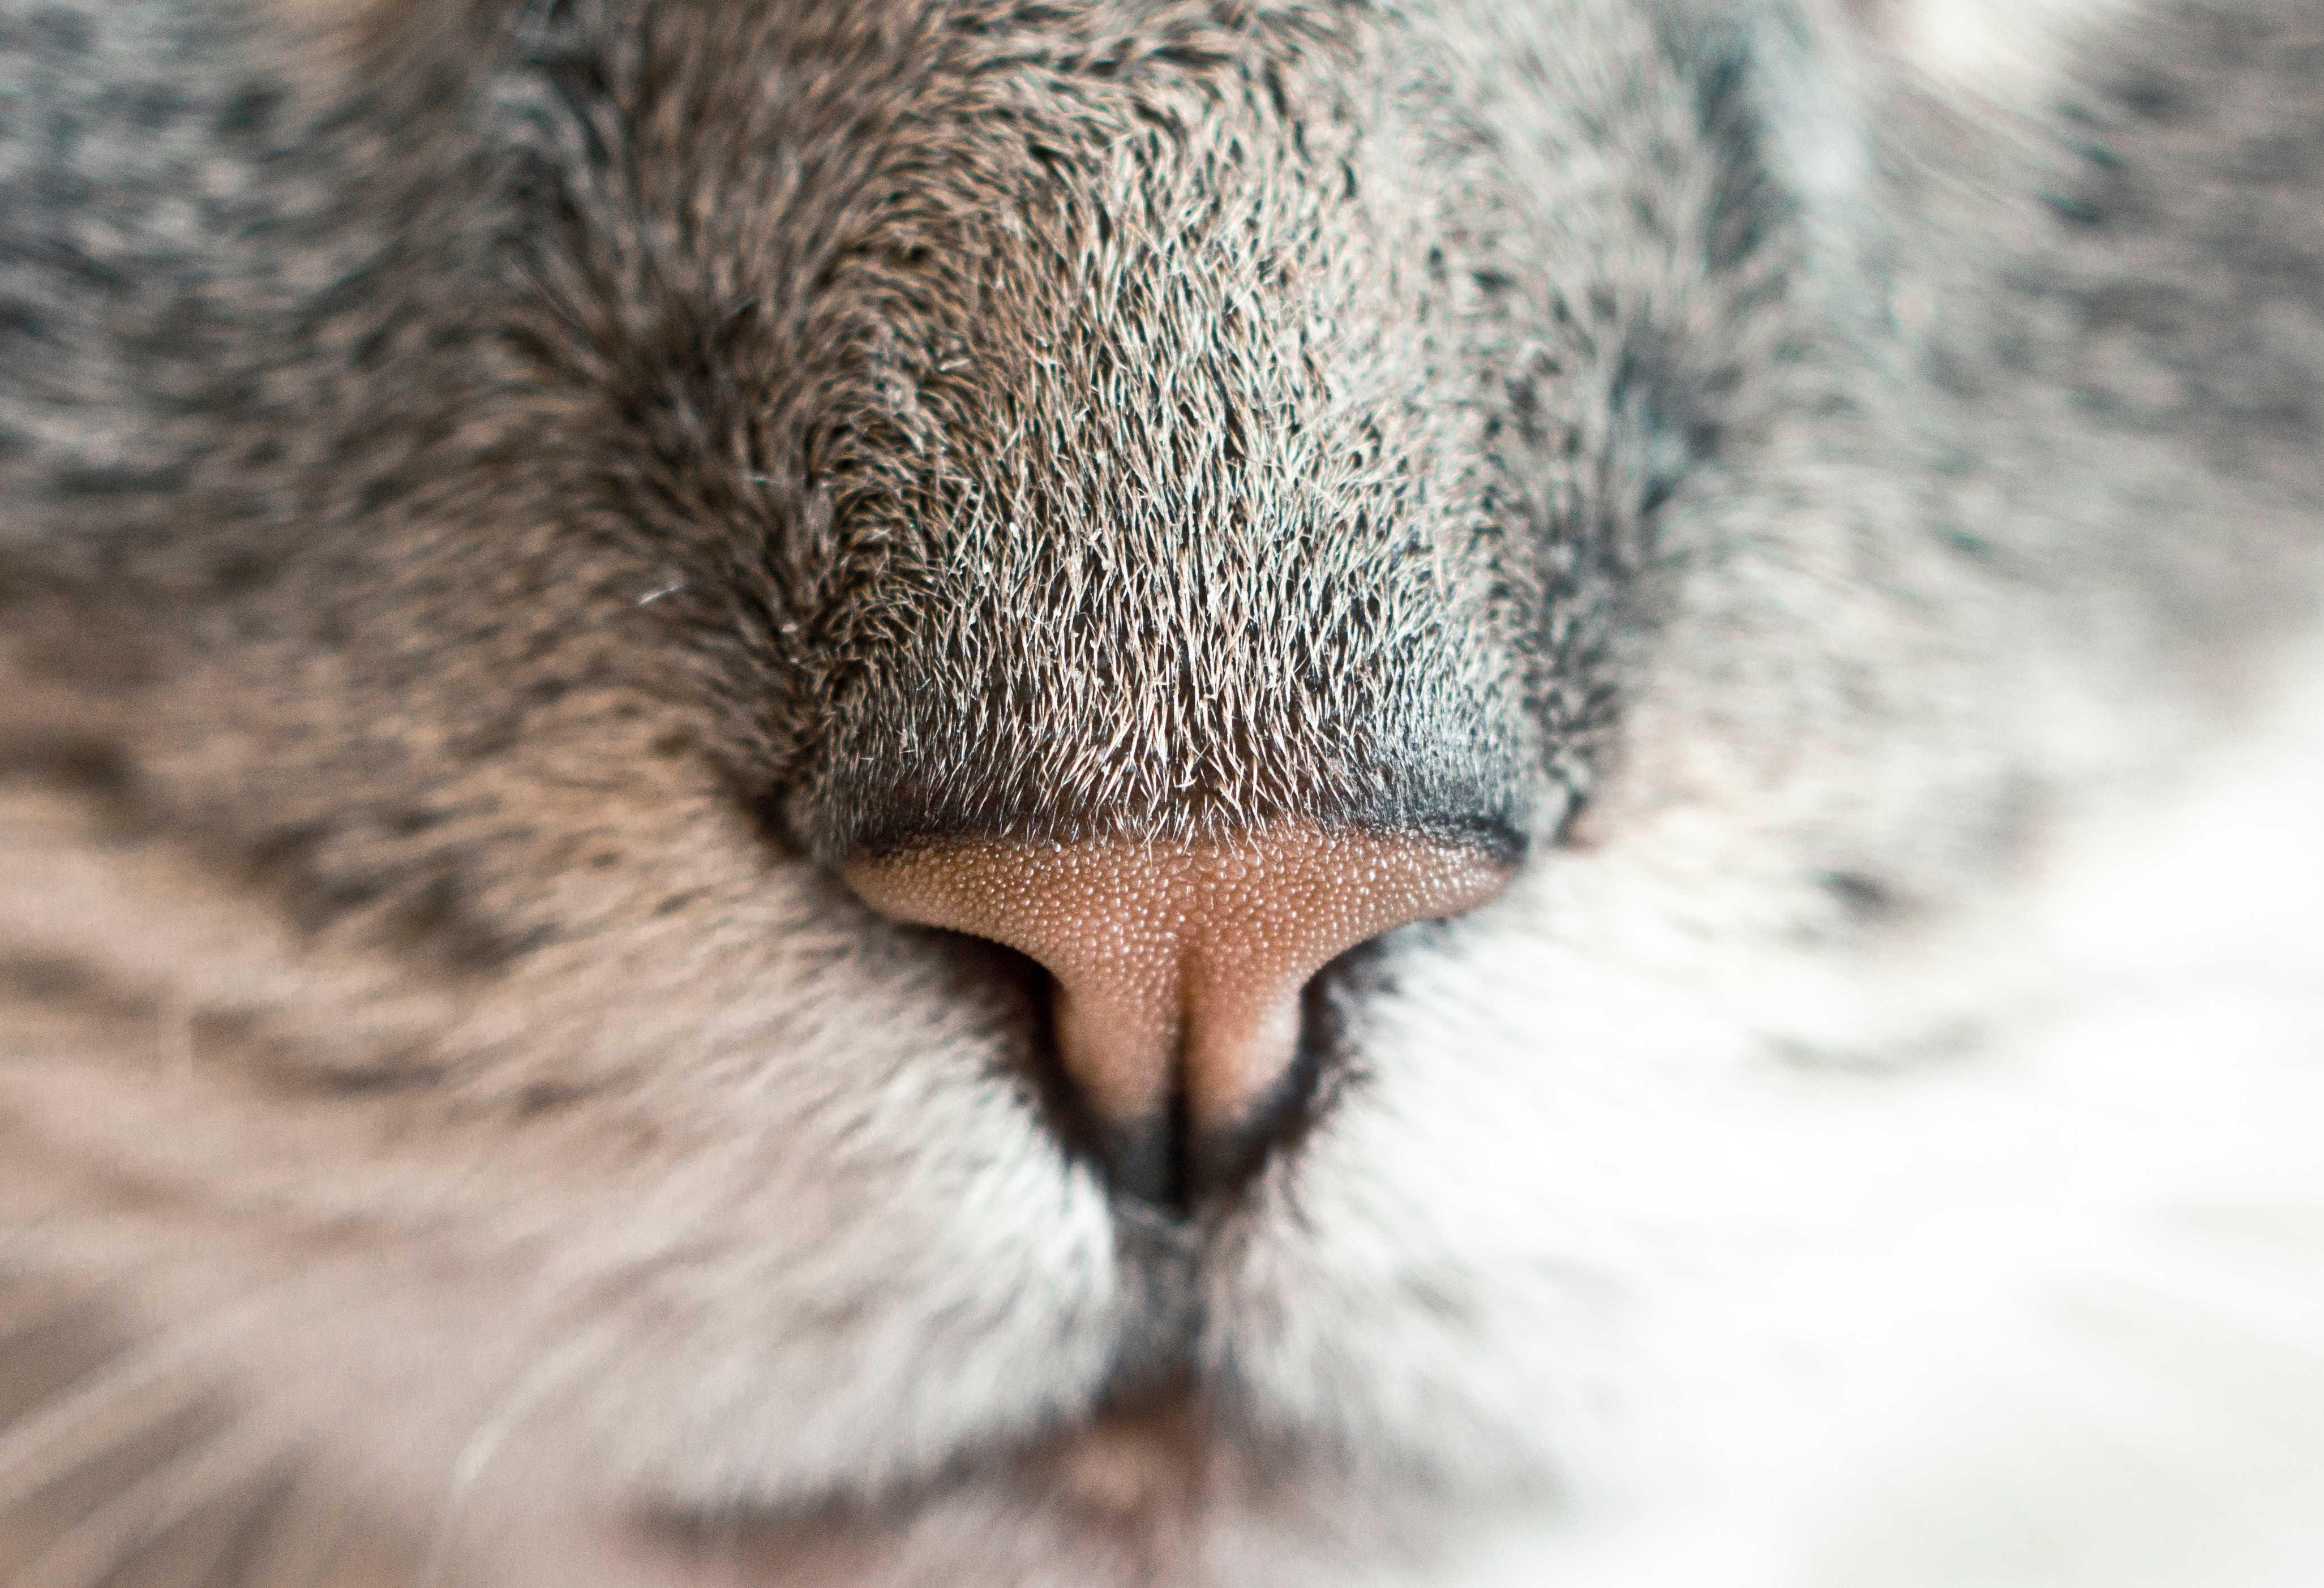

In [ ]:
import requests
from IPython.display import Image
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content
image_data = Image(content)
image_data

In [ ]:
response = ask_gemini('Describe this image as detailed as possible', image_url)
print(response)

content=" The image shows a close-up of a gray cat's nose. The nose is pink and has a black spot in the center. The fur around the nose is light gray and there are some longer, darker gray whiskers."
